In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
# Loads nicard and scope
manager.startModule('logic','cavitylogic')

0

# Initialize set up


* Amplifyer is fet -15V and = +85V 
* Calibrate strain gauge to zero with the kinesis software
* Pull fiber back
* Set nicard to -3.75

In [2]:
cavitylogic._ni.cavity_set_voltage(0.0)

0

In [3]:
cavitylogic._current_filepath = r'C:\BittorrentSyncDrive\Personal - Rasmus\Rasmus notes\Measurements\171001_position15_2'

0

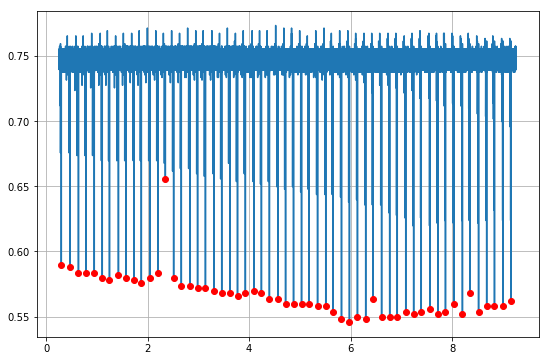

In [5]:
cavitylogic.last_sweep = None
cavitylogic.get_nth_full_sweep(sweep_number=1, save=True)

* Move close with fiber

In [6]:
cavitylogic.ramp_popt = cavitylogic._fit_ramp(xdata=cavitylogic.time_trim[::9], ydata=cavitylogic.volts_trim[cavitylogic.ramp_channel,::9])
Modes = cavitylogic._ni.sweep_function(cavitylogic.RampUp_time[cavitylogic.first_corrected_resonances],*cavitylogic.ramp_popt)

In [7]:
cavitylogic.current_mode_number= len(cavitylogic.first_corrected_resonances)-2

In [8]:
len(cavitylogic.first_corrected_resonances)

57

In [9]:
cavitylogic.linewidth_measurement(Modes,target_mode = cavitylogic.current_mode_number, repeat=10, freq=40)

0

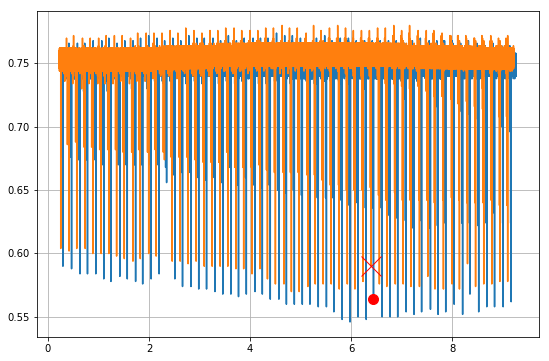

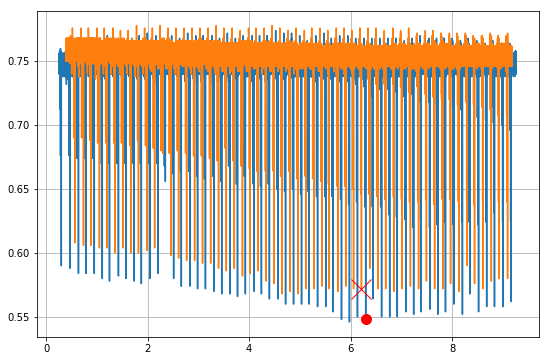

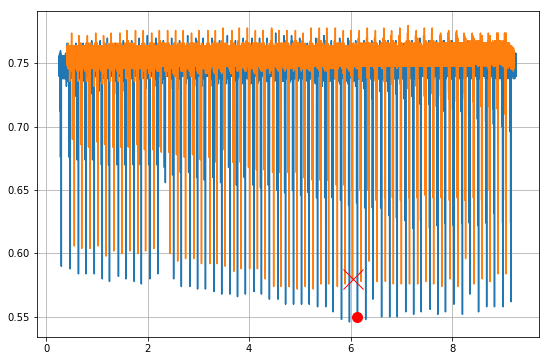

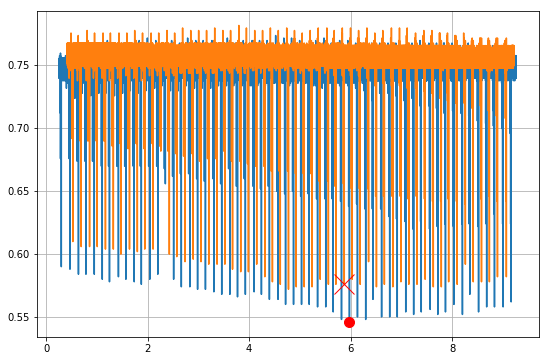

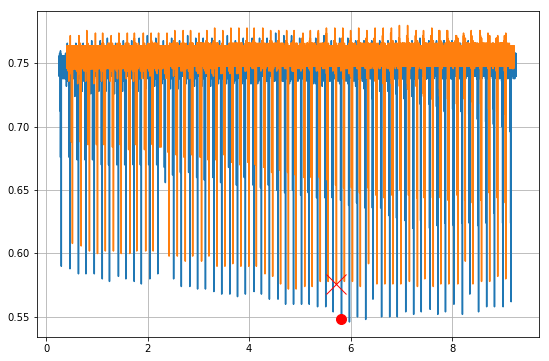

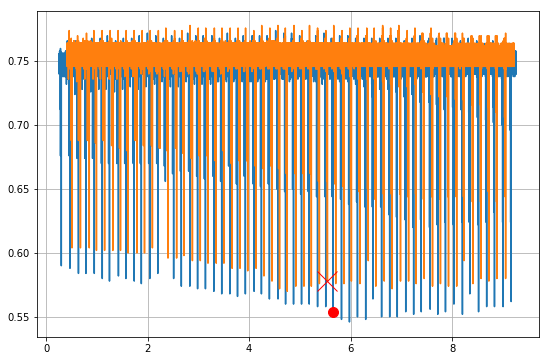

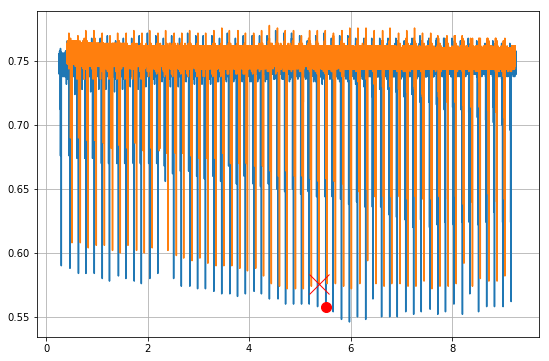

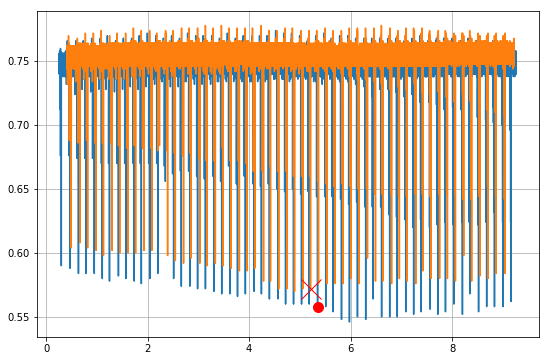

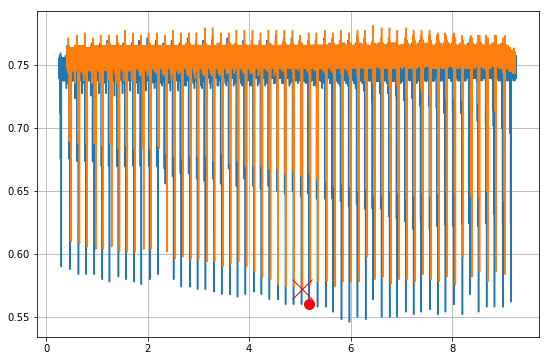

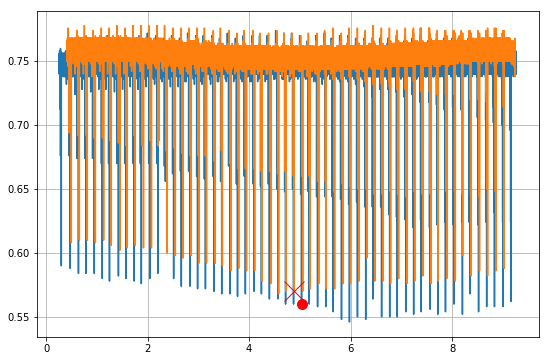

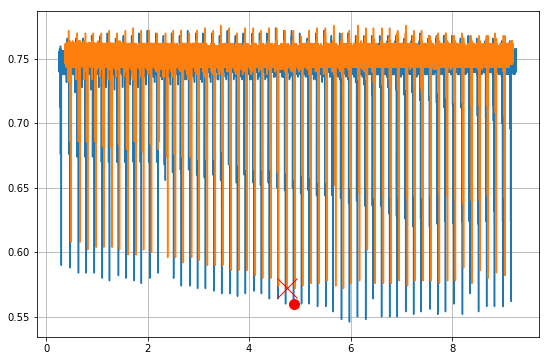

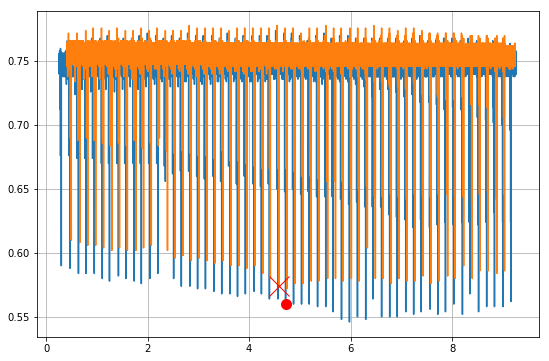

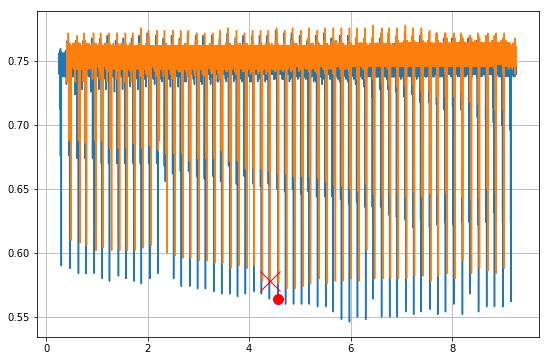

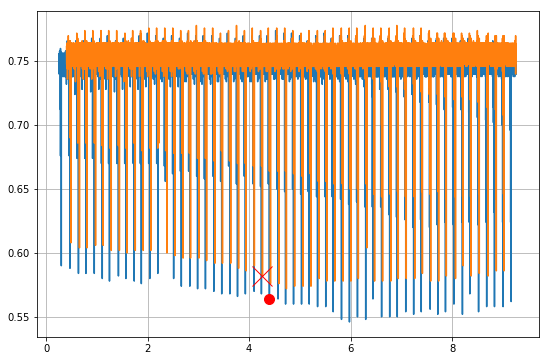

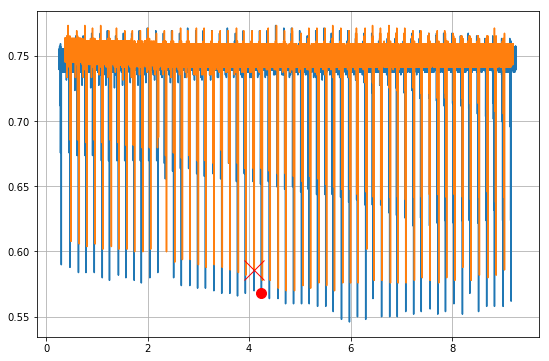

In [11]:
high_mode=len(cavitylogic.first_corrected_resonances)-2
low_mode=0

for i in range(15):
    cavitylogic.current_mode_number -=1
    ret_val = cavitylogic.get_nth_full_sweep(sweep_number=2+i)
    target_mode = cavitylogic.get_target_mode(cavitylogic.current_resonances, low_mode=low_mode, high_mode=high_mode, plot=True)
    if target_mode == None:
        print('Moved more that 5 modes')
    cavitylogic.ramp_popt = cavitylogic._fit_ramp(xdata=cavitylogic.time_trim[::9], ydata=cavitylogic.volts_trim[cavitylogic.ramp_channel,::9])
    Modes = cavitylogic._ni.sweep_function(cavitylogic.RampUp_time[cavitylogic.current_resonances],*cavitylogic.ramp_popt)
    cavitylogic.linewidth_measurement(Modes,target_mode = target_mode, repeat=10, freq=40)

In [ ]:
cavitylogic.current_mode_number

In [ ]:
target_mode

In [ ]:
cavitylogic.mode_shift_list